<a href="https://colab.research.google.com/github/vidyam99/MLPlayer/blob/master/Model_compare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


LR: 0.769515 (0.048411)
KNN: 0.726555 (0.061821)
CART: 0.699163 (0.055555)
SVM: 0.651025 (0.072141)
RFC: 0.753845 (0.075823)
GB: 0.764286 (0.059284)
LDA: 0.773462 (0.051592)
NB: 0.755178 (0.042766)
Predicted model=LinearDiscriminantAnalysis
Second best model=GB


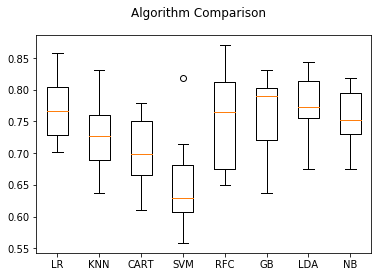

Best: 0.736979 using {'weights': 'uniform', 'n_neighbors': 10, 'n_jobs': -1, 'leaf_size': 5, 'algorithm': 'brute'}
Execution time: 1.954843521118164 ms
0.71484375


'print("[INFO] randomized search took {:.2f} seconds".format(\n\ttime.time() - start))\nacc = grid.score(testData, testLabels)\nprint("[INFO] grid search accuracy: {:.2f}%".format(acc * 100))\nprint("[INFO] randomized search best parameters: {}".format(\n\tgrid.best_params_))'

In [9]:
# Compare Algorithms
import pandas
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
import numpy as np
from sklearn.model_selection import RandomizedSearchCV,train_test_split
import time
warnings.filterwarnings("ignore", category=FutureWarning)
# load dataset
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
#url="https://drive.google.com/open?id=1TF3yLanhUwmKDe9mpiKh5wGFLww3kkic"
#url="https://drive.google.com/open?id=1231TVD-_CsnBoMLKZ4O9y2qZsyifLJpx"
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#dataframe = pandas.read_csv(url, names=names)
#print(dataframe)
url="drive/My Drive/diabetes.csv"
dataframe = pandas.read_csv(url,error_bad_lines=False)
col=len(dataframe.columns)-1
#print(dataframe)
#print(dataframe.shape)
data=dataframe.iloc[:,0:col]
#print(data)
labels=dataframe.iloc[:,col-1]
class_col=col
array = dataframe.values
X = array[:,0:col]
Y = array[:,class_col]
#print(X)
#print(Y)

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RFC',RandomForestClassifier()))
models.append(('GB',GradientBoostingClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
Models=['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','SVC','RFC','GB','LinearDiscriminantAnalysis','GaussianNB']
# evaluate each model in turn
results = []
names = []
best=0
sec_best=0
scoring = 'accuracy'
i=0
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	if cv_results.mean()>best:
		best=cv_results.mean()
		mo=i
	elif best>cv_results.mean()>sec_best:
		sec_best=cv_results.mean()
		mb=i
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
	i+=1
print(f"Predicted model={Models[mo]}")
print(f"Second best model={Models[mb]}")
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
(trainData, testData, trainLabels, testLabels) = train_test_split(
	data, labels, test_size=0.25, random_state=42)
ch=mo
if ch==7 or ch==8:
	ch=0
if ch==0:
	print("No hyperparameters")
else:
	if ch==1:
		#For LogisticRegression--------------------------------------------------------------->
		from sklearn.linear_model import LogisticRegression
		model = LogisticRegression(penalty='l2')
		dual=[True,False] 
		max_iter=[100,110,120,130,140]
		C = [1.0,1.5,2.0,2.5]
		params = dict(dual=dual,max_iter=max_iter,C=C)
	elif ch==2:
		#For DecisionTreeClassifier----------------------------------------------------------->
		from sklearn.tree import DecisionTreeClassifier
		#making the instance
		model= DecisionTreeClassifier(random_state=1234)
		#Hyper Parameters Set
		params = {'max_features': ['auto', 'sqrt', 'log2'],
		'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
		'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
		'random_state':[123]}
	elif ch==3:
		#For SVC------------------------------------------------------------------------------->
		from sklearn.svm import SVC
		model=SVC(max_iter=1500)
		#Hyper Parameters Set
		params = {'C': [6,7,8,9,10,11,12], 
		'kernel': ['linear','rbf']}
	elif ch==4:
		#For RandomForestClassifier----------------------------------------------------------->
		#making the instance
		model=RandomForestClassifier()
		#hyper parameters set
		params = {'criterion':['gini','entropy'],
		'n_estimators':[10,15,20,25,30],
		'min_samples_leaf':[1,2,3],
		'min_samples_split':[3,4,5,6,7], 
		'random_state':[123],
		'n_jobs':[-1]}
	elif ch==5:
		#FOr GradientBoostingClassifier------------------------------------------------------->
		from sklearn.ensemble import GradientBoostingClassifier
		model=GradientBoostingClassifier()
		params = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
	elif ch==6:
		#For KNN------------------------------------------------------------------------------->
		from sklearn.neighbors import KNeighborsClassifier
		#making the instance
		model = KNeighborsClassifier(n_jobs=-1)
		#Hyper Parameters Set
		params = {'n_neighbors':[5,6,7,8,9,10],
		'leaf_size':[1,2,3,5],
		'weights':['uniform', 'distance'],
		'algorithm':['auto', 'ball_tree','kd_tree','brute'],
		'n_jobs':[-1]}
"""#ForLDA-------------------------------------------------------------------------------->
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#For GaussianNB------------------------------------------------------------------------>
from sklearn.naive_bayes import GaussianNB"""
import time
random = RandomizedSearchCV(estimator=model, param_distributions=params, cv = 3, n_jobs=-1)

start_time = time.time()
random_result = random.fit(X, Y)
random.predict(testData)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')
kfold = KFold(n_splits=3, random_state=7)
result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
print(result.mean())
"""estimator=SVC()
print(estimator.get_params())
params = {"n_neighbors": np.arange(1, 31, 2),
	"metric": ["euclidean", "cityblock"]}
(trainData, testData, trainLabels, testLabels) = train_test_split(
	data, labels, test_size=0.25, random_state=42)
model = KNeighborsClassifier(n_jobs=1)
models=GaussianNB()
grid = RandomizedSearchCV(model, params)
start = time.time()
grid.fit(trainData, trainLabels)"""
 
# evaluate the best randomized searched model on the testing
# data
"""print("[INFO] randomized search took {:.2f} seconds".format(
	time.time() - start))
acc = grid.score(testData, testLabels)
print("[INFO] grid search accuracy: {:.2f}%".format(acc * 100))
print("[INFO] randomized search best parameters: {}".format(
	grid.best_params_))"""

In [148]:
lr = LogisticRegression(penalty='l1',dual=False,max_iter=110)
lr.fit(X,Y)
lr.score(X,Y)

0.7799479166666666

In [150]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=3, random_state=7)
result = cross_val_score(lr, X, Y, cv=kfold, scoring='accuracy')
print(result.mean())``

0.76953125


In [0]:
"""from sklearn.model_selection import GridSearchCV
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)"""


In [188]:
ch=1
if ch==1:
  #For LogisticRegression--------------------------------------------------------------->
  from sklearn.linear_model import LogisticRegression
  model = LogisticRegression(penalty='l2')
  dual=[True,False] 
  max_iter=[100,110,120,130,140]
  C = [1.0,1.5,2.0,2.5]
  params = dict(dual=dual,max_iter=max_iter,C=C)
elif ch==2:
  #For DecisionTreeClassifier----------------------------------------------------------->
  from sklearn.tree import DecisionTreeClassifier
  #making the instance
  model= DecisionTreeClassifier(random_state=1234)
  #Hyper Parameters Set
  params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}
elif ch==3:
  #For SVC------------------------------------------------------------------------------->
  from sklearn.svm import SVC
  model=SVC(max_iter=1500)
  #Hyper Parameters Set
  params = {'C': [6,7,8,9,10,11,12], 
          'kernel': ['linear','rbf']}
elif ch==4:
  #For RandomForestClassifier----------------------------------------------------------->
  #making the instance
  model=RandomForestClassifier()
  #hyper parameters set
  params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
elif ch==5:
  #FOr GradientBoostingClassifier------------------------------------------------------->
  from sklearn.ensemble import GradientBoostingClassifier
  model=GradientBoostingClassifier(n_estimators = 10, random_state = 42)
  params = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
  #base_model = GradientBoostingClassifier(n_estimators = 10, random_state = 42)
  base_model.fit(trainData, trainLabels)
  base_accuracy = evaluate(base_model, testData, testLabels)
elif ch==6:
  #For KNN------------------------------------------------------------------------------->
  from sklearn.neighbors import KNeighborsClassifier
  #making the instance
  model = KNeighborsClassifier(n_jobs=-1)
  #Hyper Parameters Set
  params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
"""#ForLDA-------------------------------------------------------------------------------->
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#For GaussianNB------------------------------------------------------------------------>
from sklearn.naive_bayes import GaussianNB"""
import time
random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
random_result = random.fit(X, Y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')
kfold = KFold(n_splits=3, random_state=7)
result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
print(result.mean())

Best: 0.772135 using {'max_iter': 140, 'dual': False, 'C': 2.0}
Execution time: 0.2710578441619873 ms
0.765625


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [176]:
import time

#lr = LogisticRegression(penalty='l2')
#grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = 3, n_jobs=-1)
grid = GridSearchCV(model, param_grid=params, n_jobs=1)
start_time = time.time()
grid_result = grid.fit(X, Y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
kfold = KFold(n_splits=3, random_state=7)
result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
print(result.mean())
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.764323 using {'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 2, 'random_state': 123}
0.6796875
Execution time: 2.1578192710876465 ms


In [0]:
from sklearn.model_selection import RandomizedSearchCV

In [167]:
random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
random_result = random.fit(X, Y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')
kfold = KFold(n_splits=3, random_state=7)
result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
print(result.mean())

Best: 0.773438 using {'max_iter': 120, 'dual': False, 'C': 2.5}
Execution time: 0.24812865257263184 ms
0.71484375


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [4]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
def evaluate(model, test_features, test_labels):                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy
#GradientBoostingClassifier
base_model = GradientBoostingClassifier(n_estimators = 10, random_state = 42)
base_model.fit(trainData, trainLabels)
base_accuracy = evaluate(base_model, testData, testLabels)
#RandomForestCLassifier
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(trainData, trainLabels)
base_accuracy = evaluate(base_model, testData, testLabels)
#RandomForestRegressor
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(trainData, trainLabels)
base_accuracy = evaluate(base_model, testData, testLabels)


NameError: ignored

In [0]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)
rf_random.best_params_

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [79]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV,train_test_split
import time
#from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
# construct the set of hyperparameters to tune
params = {"n_neighbors": np.arange(1, 31, 2),
	"metric": ["euclidean", "cityblock"]}
(trainData, testData, trainLabels, testLabels) = train_test_split(
	data, labels, test_size=0.25, random_state=42)
model = KNeighborsClassifier(n_jobs=2)
grid = RandomizedSearchCV(model, params)
start = time.time()
grid.fit(trainData, trainLabels)
 
# evaluate the best randomized searched model on the testing
# data
print("[INFO] randomized search took {:.2f} seconds".format(
	time.time() - start))
acc = grid.score(testData, testLabels)
print("[INFO] grid search accuracy: {:.2f}%".format(acc * 100))
print("[INFO] randomized search best parameters: {}".format(
	grid.best_params_))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


[INFO] randomized search took 0.32 seconds
[INFO] grid search accuracy: 13.54%
[INFO] randomized search best parameters: {'n_neighbors': 21, 'metric': 'cityblock'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
